# Biodiversity in US National Parks

*Author: Miguel García Camacho, https://github.com/mgcamacho/*

This project aims to interpret the data from the National Parks Service about the endangered species in different parks. The data comes from two CSV files: “species_info.csv” and “observations.csv”. The species file contains information about each species, such as its scientific name, common names, category and conservation status. The observations file records the number of times each species was observed in each park.

The project seeks to answer the following questions:

- What proportion of species are endangered or extinct?
- What categories of species (plants, mammals, etc.) are the most threatened?
- What are the top 3 species by number of individuals in each park?

The project uses various techniques and tools to analyze and visualize the data, such as pandas, numpy, seaborn, matplotlib and textwrap.

### Import libraries and data

Importing data and performing an initial assessment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

observations = pd.read_csv('observations.csv')
observations.head()

species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [2]:
print(observations.info())
print(species.info())
print(observations.dtypes)
print(species.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_name

A summary of the data was obtained using methods, which showed that the species dataframe has 5824 rows and 4 columns, while the observations dataframe has 23296 rows and 3 columns. The data types of the columns are mostly object (string), except for the observations column, which is int64 (integer).

By taking a quick glance into the data we can see that 'observations' contains information about the species in each park, and the number of times each species was seen. On the other hand, the species dataset contains information of each species, including its scientific name, common names, category and conservation status.

In [3]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


### Data preprocessing

From the initial assessment it appears that there are no null data. However, data is examined to understand data missingness as well as duplicates.

In [4]:
species_rows = species.count()[1]

print('% Species Missing Data')
print((1 - species.count() / species_rows) * 100)

% Species Missing Data
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


The only variable missing values is "conservation_status" at 96% of missingness. As this variable tells if the species is endangered, we can assume that the species without conservation status are not endangered or its status was unknown at the time data was collected.

Before proceeding to impute the missing data, the data is cleaned from duplicates.

In [5]:
species = species.drop_duplicates()
observations = observations.drop_duplicates()

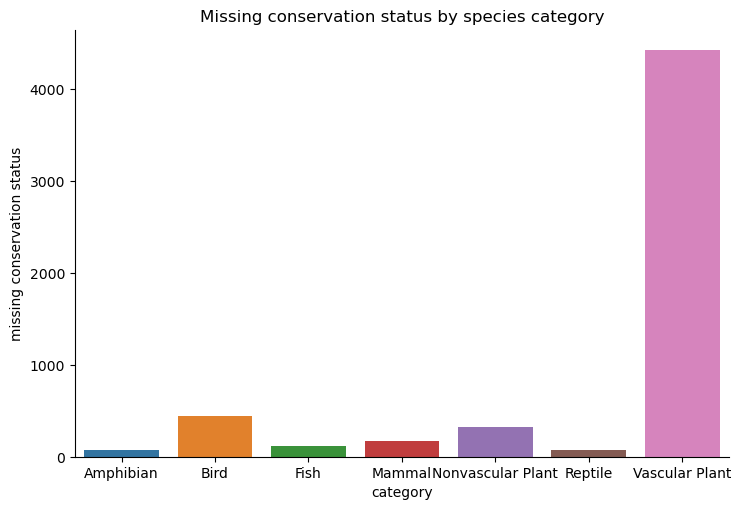

<Figure size 640x480 with 0 Axes>

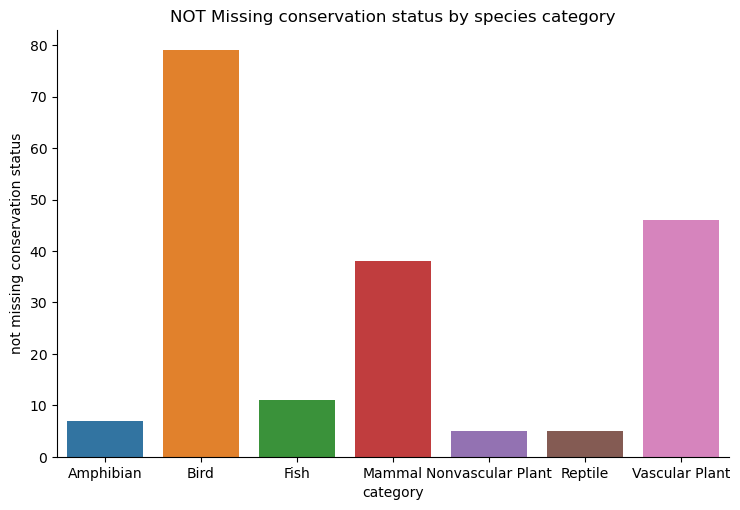

<Figure size 640x480 with 0 Axes>

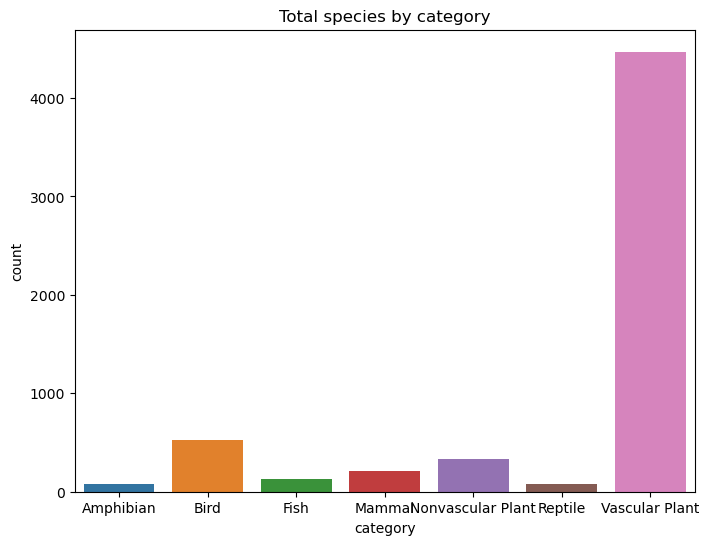

<Figure size 640x480 with 0 Axes>

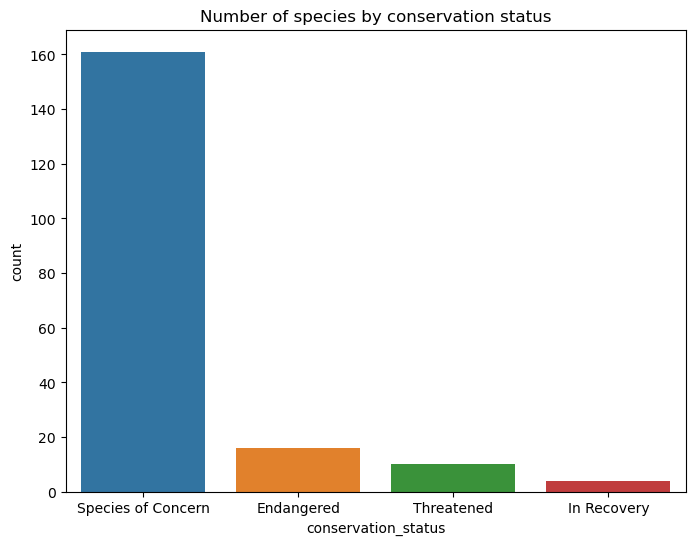

<Figure size 640x480 with 0 Axes>

In [63]:
speciesMissingData = species['conservation_status'].isnull().groupby(species['category']).sum().reset_index()
speciesNoMissingData = (~species['conservation_status'].isnull()).groupby(species['category']).sum().reset_index()

sns.catplot(
    data=speciesMissingData, kind='bar',
    x='category',
    y='conservation_status',
    aspect = 1.5).set(title='Missing conservation status by species category').\
    ax.set(ylabel='missing conservation status')
plt.show()
plt.clf()

sns.catplot(
    data=speciesNoMissingData, kind='bar',
    x='category',
    y='conservation_status',
    aspect = 1.5).set(title='NOT Missing conservation status by species category').\
    ax.set(ylabel='not missing conservation status')
plt.show()
plt.clf()


plt.figure(figsize=(8,6))
sns.countplot(data=species, x='category', order = sorted(species.category.unique()))
plt.title('Total species by category')
plt.show()
plt.clf()

plt.figure(figsize=(8,6))
sns.countplot(data=species, x='conservation_status')
plt.title('Number of species by conservation status')
plt.show()
plt.clf()

The missingness appears to be proportional, which would suggest that the data is Missing Not At Random (MNAR), but on further inspection on species with an assigned conservation status, birds, mammals and plants appear to be the majority, which suggests that the data is Missing Not At Random (MNAR). The conservation status of a species depends on factors not included in the dataset, as geographical distribution, habitat or other threats.

Other useful information extracted from this point is that birds is most common species among those with an assigned conservation status, and overall, most species with a status are labeled under "Species of Concern".

### Data visualization

Due to the nature of the datasets, visualizations are the best way to analyze data and find out answers to some basic questions, such as the proportion of species category by conservation status, the number of species observed by park, among others.

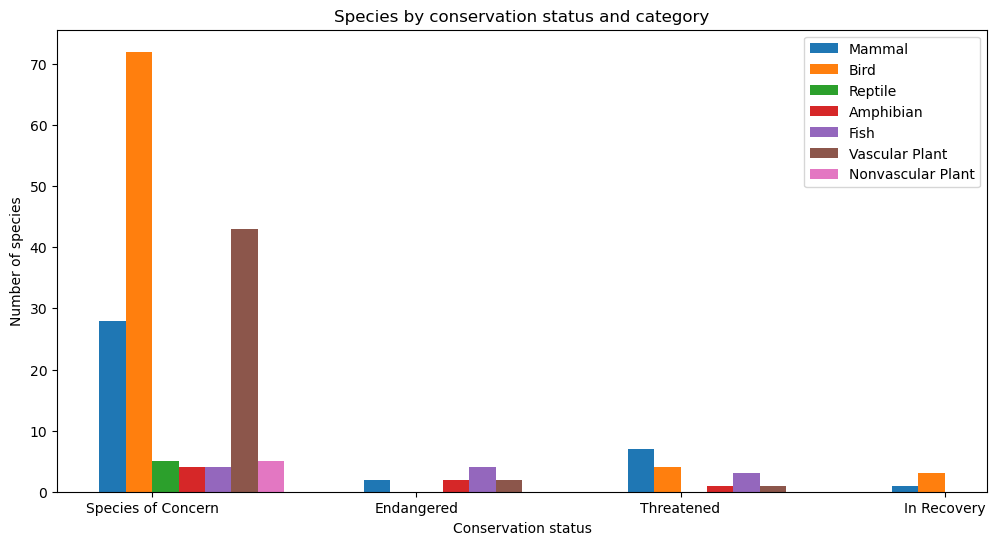

In [7]:
conservation_species = species[~species.conservation_status.isnull()]
status = conservation_species.conservation_status.unique()

fig, ax = plt.subplots(figsize=(12, 6)) #use the figsize argument in the plt.subplots() function

status_dict = {"Species of Concern": 1, "Threatened": 2, "Endangered": 3, "In Recovery": 4}

for i, category in enumerate(conservation_species.category.unique()):
  data = conservation_species[conservation_species.category == category]
  data_count = data.groupby(['conservation_status']).count()
  data_count = data_count.reindex(status)
  width = 0.1
  position = i * width - (width * 3) / 2
  status_num = list(map(lambda x: status_dict[x], status))
  status_num = [x + position for x in status_num]
  ax.bar(status_num, data_count['category'], width=width, label=category)

ax.set_title("Species by conservation status and category")
ax.set_xlabel("Conservation status")
ax.set_ylabel("Number of species")
ax.legend(loc=1)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(status)
plt.show()


### Data analysis by park

The parks can be analyzed to know which one has a greater variety in species as well as the animal count per park.

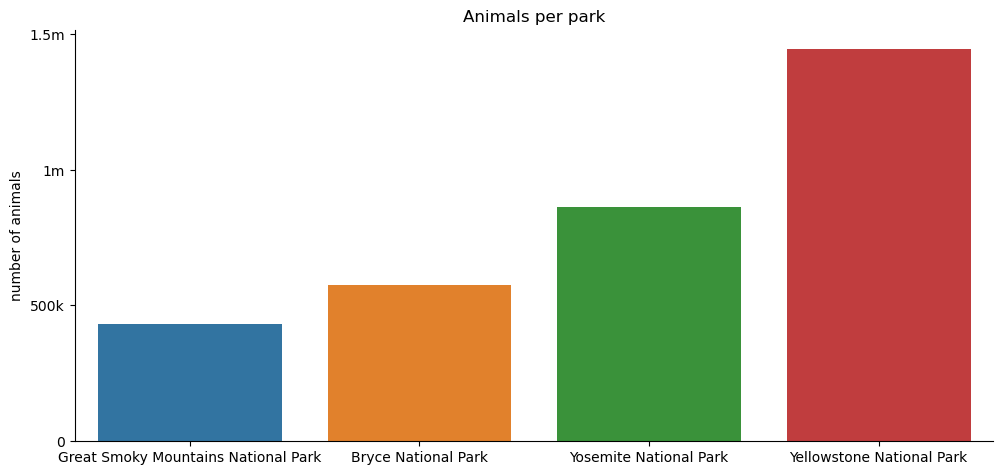

<Figure size 640x480 with 0 Axes>

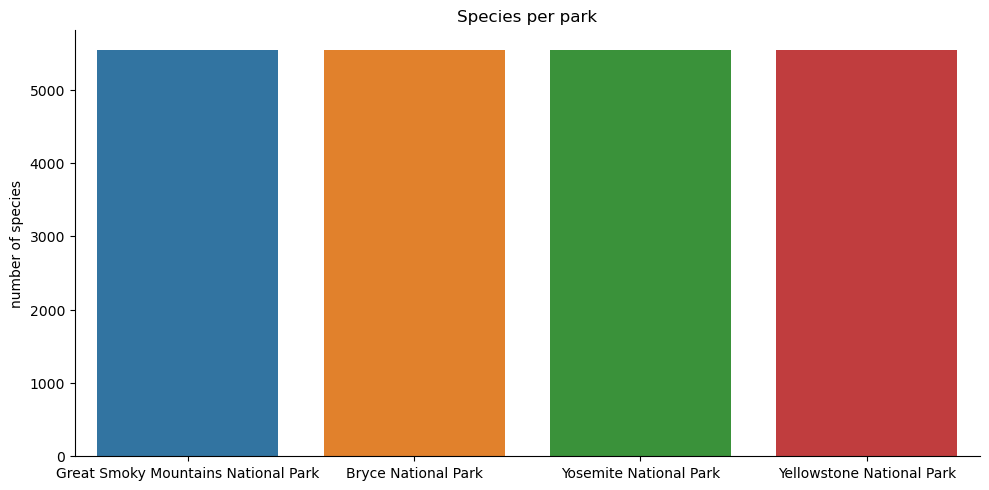

<Figure size 640x480 with 0 Axes>

In [66]:
animals_per_park = observations[('observations')].groupby(observations.park_name).sum().sort_values().reset_index()

g = sns.catplot(data=animals_per_park, x='park_name', kind='bar',
    y='observations', aspect = 2)
g.ax.set(title='Animals per park')
g.ax.set(ylabel='number of animals')
g.ax.set(xlabel='')
g.ax.set_yticks([0,500000,1000000,1500000])
g.ax.set_yticklabels(['0','500k', '1m','1.5m'])
plt.show()
plt.clf()

species_per_park = observations['scientific_name'].groupby(observations.park_name).nunique().reset_index()
species_per_park

h = sns.catplot(data=species_per_park, x='park_name', kind='bar',
    y='scientific_name', aspect = 2, order=['Great Smoky Mountains National Park', 'Bryce National Park', 'Yosemite National Park', 'Yellowstone National Park'])
h.ax.set(title='Species per park')
h.ax.set(xlabel='')
h.ax.set(ylabel='number of species')
plt.show()
plt.clf()

### Top 3 most observed species by park

Each park has the same number of species, but Yellowstone National Park has many more individuals than the other parks, while Great Smoky Mountains National Park is the one with the fewest individuals.

Other relevant information is the top 3 species by number of observations in each park.

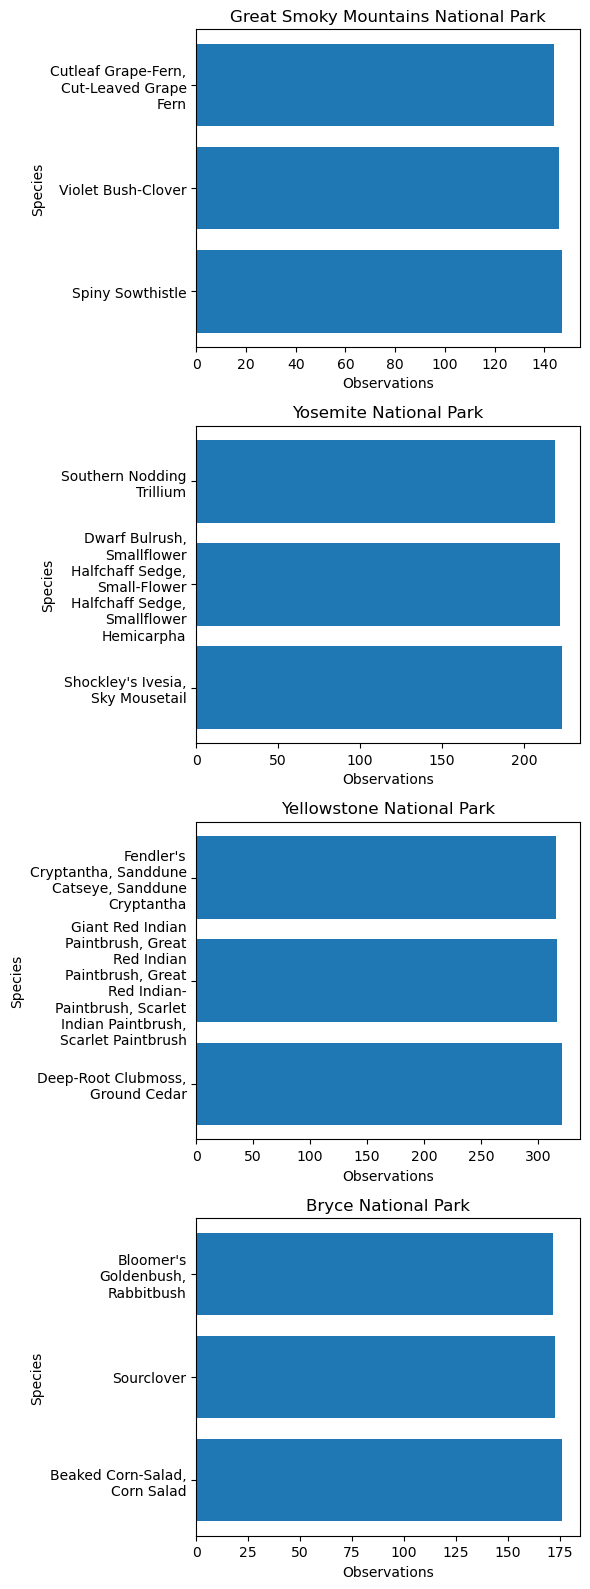

In [54]:
most_common_species_per_park = observations.merge(species[['scientific_name', 'common_names']], on='scientific_name')

def wrap_text(text, max_width):
    return textwrap.fill(text, max_width)
most_common_species_per_park['common_names'] = most_common_species_per_park['common_names'].apply(wrap_text, max_width=20)

park_names = most_common_species_per_park['park_name'].unique()

plt.figure(figsize=(6, 16))
for i, park in enumerate(park_names):
    park_data = most_common_species_per_park[most_common_species_per_park['park_name'] == park]
    park_data = park_data.nlargest(3, 'observations')
    plt.subplot(len(park_names), 1, i+1)
    plt.barh(park_data['common_names'], park_data['observations'])
    plt.xlabel('Observations')
    plt.ylabel('Species')
    plt.title(park)
plt.tight_layout()
plt.show()




### Scarcest species by park

Another aspect is to identify those species that have lowest observation counts in each park. These species may have a low population density, restricted habitat range or a secretive lifestly.

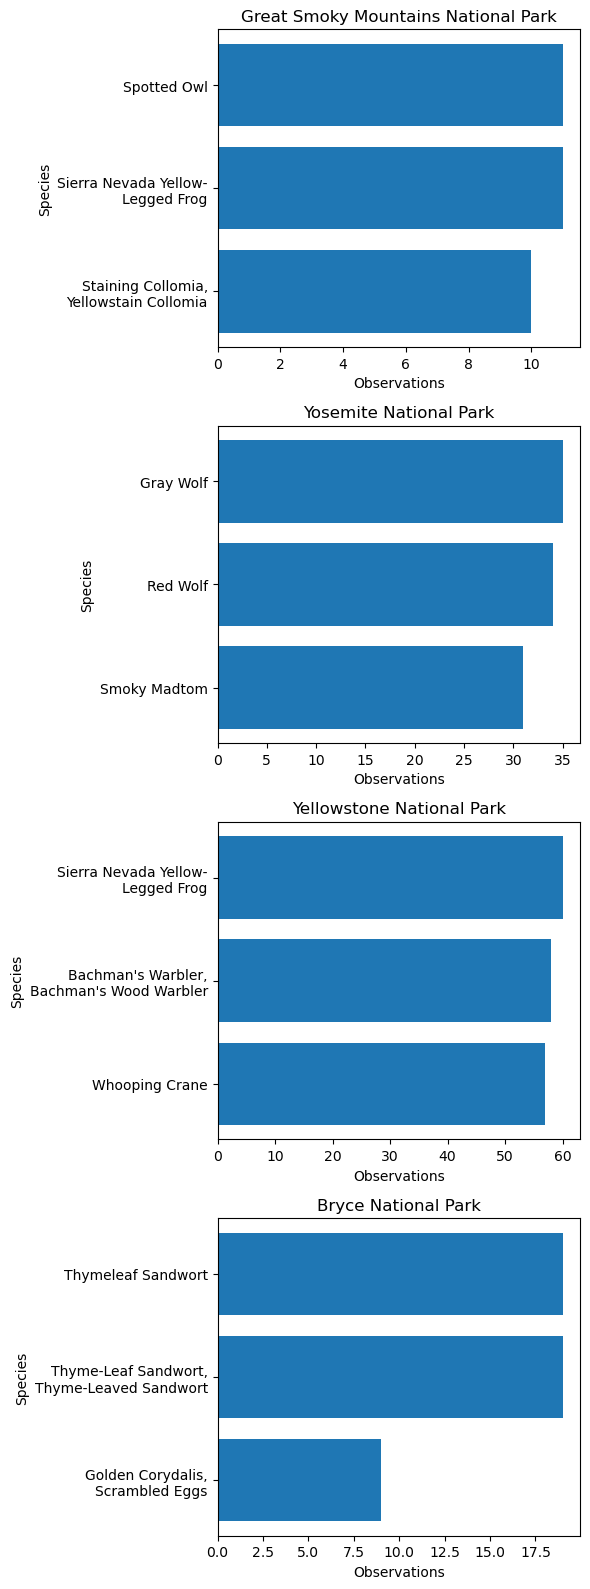

In [55]:
least_common_species_per_park = observations.merge(species[['scientific_name', 'common_names']], on='scientific_name')

def wrap_text(text, max_width):
    return textwrap.fill(text, max_width)
least_common_species_per_park['common_names'] = least_common_species_per_park['common_names'].apply(wrap_text, max_width=25)

park_names = least_common_species_per_park['park_name'].unique()

plt.figure(figsize=(6, 16))
for i, park in enumerate(park_names):
    park_data = least_common_species_per_park[least_common_species_per_park['park_name'] == park]
    park_data = park_data.nsmallest(3, 'observations')
    plt.subplot(len(park_names), 1, i+1)
    plt.barh(park_data['common_names'], park_data['observations'])
    plt.xlabel('Observations')
    plt.ylabel('Species')
    plt.title(park)
plt.tight_layout()
plt.show()


# Findings

- The National Parks Service data doesn't assign a conservation status to most species, which could mean that they are not endangered or their status is unknown. However, among those with a status, most are labeled as "Species of Concern", which means that there are around 160 species at risk of becoming endangered.
- Birds and mammals have the highest proportion of animal species with a conservation status assigned. These categories may require more attention and protection from conservation efforts.
- Yellowstone National Park hosts a higher count of animals and plants than the other parks.
- Vascular plants have the highest variety of species, with over four thousand different species identified. The second category with highest variety are birds, with less than one thousand species.